In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [22]:
!pip install tslearn

  Obtaining dependency information for tslearn from https://files.pythonhosted.org/packages/97/22/8dba9a7149d51fe0b6163a5a6b7efc315ab3c097cb6b0d1fc649a03f2722/tslearn-0.6.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/374.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/374.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/374.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/374.4 kB 325.1 kB/s eta 0:00:02
   --------- ----------------------------- 92.2/374.4 kB 655.4 kB/s eta 0:00:01
   --------------------------------- ------ 317.4/374.4 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 374.4/374.4 kB 1.9 MB/s eta 0:00:00


In [23]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

## Objectifs

L’objectif de ce projet est d’utiliser la classification non supervisée pour résumer les variations de
la consommation d’énergie de 100 appartements, observée toutes les 30 minutes durant 91 jours
consécutifs. Plus spécifiquement, on cherche ici à obtenir une classification des jours, uniforme pour
l’ensemble des appartements. Une telle classification pourra être utile, par exemple, dans le cadre
de la surveillance d’un réseau d’électricité.

## Données

In [33]:
# Chargement des données
X = np.loadtxt("http://allousame.free.fr/mlds/donnees/X.txt", delimiter=" ")
APPART = np.loadtxt("http://allousame.free.fr/mlds/donnees/APPART.txt")
JOUR = np.loadtxt("http://allousame.free.fr/mlds/donnees/JOUR.txt")

In [34]:
X

array([[-1.78678542, -1.75930576, -1.73182609, ..., -0.07752588,
        -0.27692318, -0.43319467],
       [-0.39447824, -0.63423412, -0.87399   , ..., -0.28779161,
        -0.45691063, -0.49285271],
       [-1.21674188, -1.39542228, -1.57410269, ...,  0.73604612,
         0.401007  ,  0.03188267],
       ...,
       [-0.70302124, -0.93182094, -1.16062064, ...,  0.15379825,
        -0.14706936, -0.46457927],
       [-0.68714241, -0.96377649, -1.24041058, ..., -0.27947412,
        -0.49102536, -0.67905846],
       [-0.67302357, -0.89896993, -1.1249163 , ...,  0.17305015,
        -0.30521998, -0.8388175 ]])

## Partie 1 : Transformation du tableau X en un tableau de données catégorielles Y

L’objectif de cette partie est de regrouper les lignes du tableau X en K classes, puis, à partir des
labels des classes, de transformer les données journalières initiales (X) en un tableau de données
catégorielles Y (100 lignes et 91 colonnes).

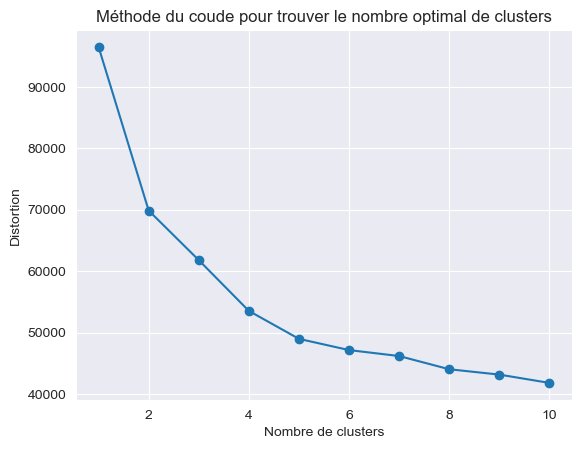

In [46]:
# Méthode du coude pour trouver le nombre optimal de clusters
distortions = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Visualisation
plt.plot(K_range, distortions, marker='o')
plt.title('Méthode du coude pour trouver le nombre optimal de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Distortion')
plt.show()


In [69]:
n_clusters = 5
kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", verbose=True)
kmeans.fit(X)
labels = kmeans.labels_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 9100 out of 9100 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 27300 out of 27300 | elapsed:    5.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 27300 out of 27300 | elapsed:    9.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 27300 out of 27300 | elapsed:    6.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 27300 out of 27300 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:   11.9s finished


2.545 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    8.6s finished


1.563 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:   14.6s finished


1.532 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    9.9s finished


1.515 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    8.8s finished


1.505 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    8.5s finished


1.500 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.7s finished


1.497 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.5s finished


1.496 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.5s finished


1.495 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.6s finished


1.494 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.4s finished


1.494 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    9.9s finished


1.493 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:   10.7s finished


1.493 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    9.9s finished


1.493 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    8.5s finished


1.493 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    8.0s finished


1.493 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    9.5s finished


1.493 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.9s finished


1.493 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:   12.3s finished


1.493 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:   10.2s finished


1.493 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    8.2s finished


1.493 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.7s finished


1.492 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.8s finished


1.492 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.6s finished


1.492 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.8s finished


1.492 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.8s finished


1.492 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.5s finished


1.492 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.8s finished


1.492 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    8.9s finished


1.492 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.5s finished


1.492 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    8.2s finished


1.492 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.8s finished


1.491 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.6s finished


1.491 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.6s finished


1.491 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.3s finished


1.491 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.6s finished


1.490 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.3s finished


1.490 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.5s finished


1.489 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.2s finished


1.489 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.9s finished


1.488 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.7s finished


1.488 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    8.1s finished


1.487 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.7s finished


1.487 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.8s finished


1.486 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.9s finished


1.485 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.5s finished


1.485 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.7s finished


1.484 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.6s finished


1.483 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.6s finished


1.482 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.6s finished


1.482 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 45500 out of 45500 | elapsed:    7.8s finished


[[0 4 0 ... 4 2 4]
 [0 0 0 ... 1 2 2]
 [3 3 0 ... 0 4 4]
 ...
 [0 1 0 ... 0 4 4]
 [0 0 0 ... 1 2 1]
 [1 0 0 ... 4 2 2]]


<Axes: >

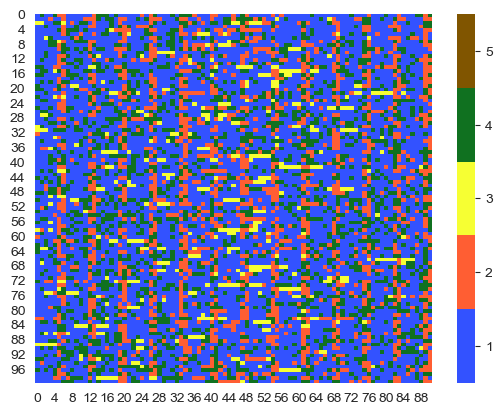

In [70]:
# Créer le tableau de données catégorielles Y
Y = pd.DataFrame(index=range(1, 101), columns=range(1, 92))

# Remplir le tableau Y avec les labels des clusters en utilisant JOUR
for i in range(1, 101):
    labels_appart = labels[APPART == i]
    jours_appart = JOUR[APPART == i].astype(int)
    Y.loc[i, jours_appart] = labels_appart

# Convertir le DataFrame en une matrice NumPy
Y_matrix = Y.values


# Enregistrement du résultat
Y.to_csv("tableau_Y.csv", index_label="APPART")


cmap_dict = {0: '#3352FF', 1: '#FF5E33', 2: '#F6FF33', 3: '#107120', 4:'#805500'}
cmap = ListedColormap([cmap_dict[i] for i in range(0, 5)])

# Afficher la matrice
print(Y_matrix)
#plt.imshow(Y_matrix.astype(dtype=int), cmap="tab10")
sns.heatmap(Y_matrix.astype(int), cmap=cmap, vmin=0.5, vmax=5.5)

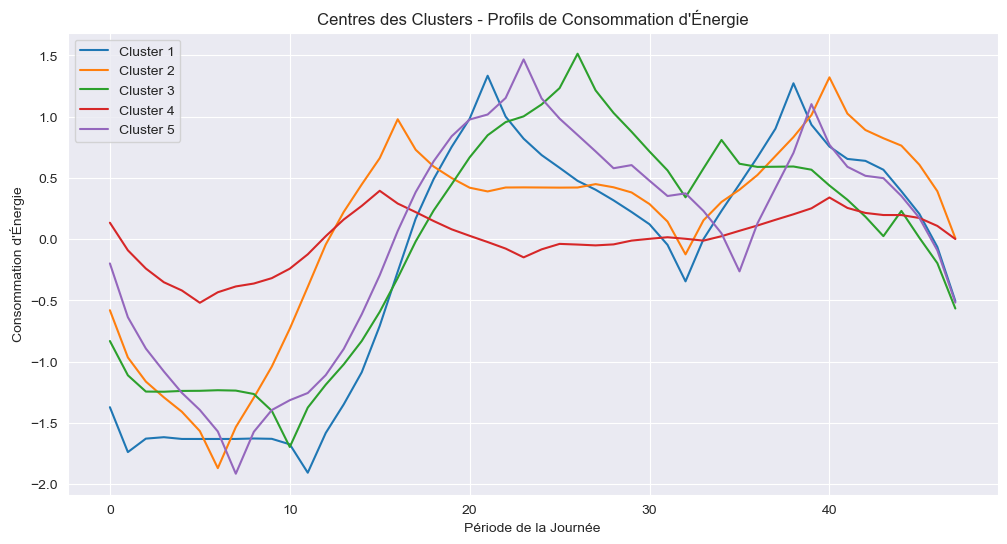

In [71]:
# Visualisation des centres des clusters
plt.figure(figsize=(12, 6))
for cluster in range(K):
    plt.plot(kmeans.cluster_centers_[cluster], label=f"Cluster {cluster + 1}")

plt.title("Centres des Clusters - Profils de Consommation d'Énergie")
plt.xlabel("Période de la Journée")
plt.ylabel("Consommation d'Énergie")
plt.legend()
plt.show()

Au vu de la méthode du coude un choix de **k=5** est le plus judicieux afin de concerver le maximum de variabilité
Essayons d'entrainer le modèle k-means avec **5 clusters** 

### K-means avec une k=3 clusters

### Interprétation 

Nous avons une consommation de journalière (24h ~ soit 30min x 48 points de série).  
En se basant sur les représentants de nos clusters, on remarque en général une baisse de consommation
en début de matinée (environ 10 x 30min soit entre 00h et 5h). 
Ensuite une augmentation de La consommation d'énergie aux alentour de 6h et 9h (entre t=10 et t=20). 
Ensuite nous assistons à une baisse environ entre 10h et 16h (soit approximativement entre t=20 et t=40). 
Cela pourrait s'expliquer par une absence en général des personnes dans les logements (travail etc..).  
Par la suite une augmentation entre 17h et 20h/21h (soit t=40 ~ 40 x 30min ~ 1200min ~ 20h). celà pourrait
correspondre à un retour d'activité (potentiellement après un retour du travail etc..). Puis enfin une 
nouvelle baisse environ entre 22h et 00h (entre t=40 et t=48) celà pourrait s'expliquer par un arrêt d'activité
(repos nocturne etc.)   

## Partie 2

### Méthode direct 

#### K-means

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  91 out of  91 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 273 out of 273 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 273 out of 273 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 273 out of 273 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 273 out of 273 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 455 out of 455 | elapsed:    0.0s finished


8.989 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 455 out of 455 | elapsed:    0.0s finished


5.434 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 455 out of 455 | elapsed:    0.0s finished


5.185 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 455 out of 455 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


5.175 --> 5.175 --> 

[Parallel(n_jobs=1)]: Done 455 out of 455 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 455 out of 455 | elapsed:    0.0s finished



        36  37  38  39  40  43  44  45  46  47  ...  75  78  80  81  82  85  \
APPART                                          ...                           
1        2   2   1   1   1   1   1   1   2   1  ...   1   0   1   1   1   1   
2        1   1   2   2   1   2   2   2   2   2  ...   0   1   0   1   1   0   
3        2   2   0   0   1   1   0   0   0   0  ...   1   1   0   0   0   1   
4        1   1   1   1   1   0   1   1   1   1  ...   1   1   1   1   1   1   
5        1   1   2   1   2   2   1   1   1   2  ...   1   1   1   0   1   1   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..   
96       1   1   1   2   2   0   0   0   1   1  ...   1   0   0   0   0   0   
97       1   0   1   1   2   1   1   1   1   2  ...   1   1   1   0   0   0   
98       1   1   1   0   1   1   1   1   1   2  ...   1   1   1   1   1   0   
99       1   2   2   2   1   1   1   1   1   1  ...   1   0   1   0   1   1   
100      1   0   1   1   1   2   2   2   2   2  ...

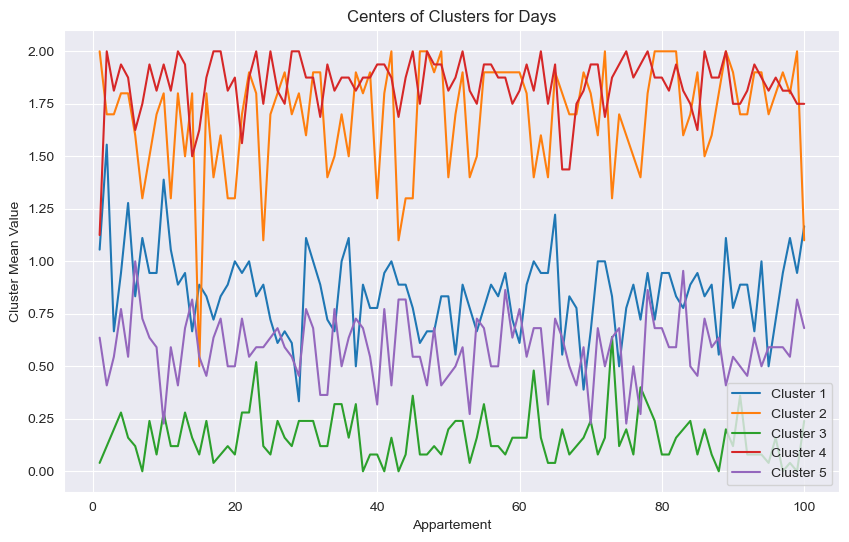

[[0 4 0 ... 4 2 4]
 [0 0 0 ... 1 2 2]
 [3 3 0 ... 0 4 4]
 ...
 [0 1 0 ... 0 4 4]
 [0 0 0 ... 1 2 1]
 [1 0 0 ... 4 2 2]]


<Axes: ylabel='APPART'>

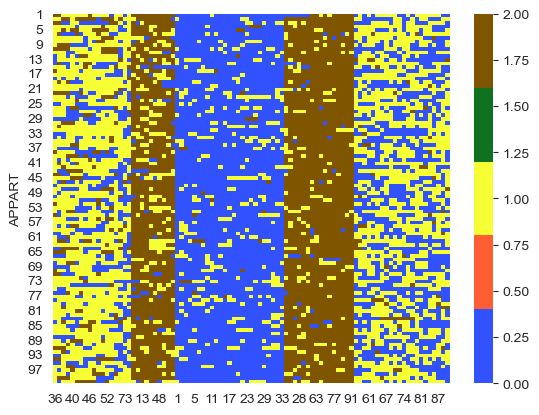

In [73]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Chargement des données
Y = pd.read_csv("tableau_Y_3.csv", index_col="APPART")

# Nombre de classes K pour la nouvelle classification
K_days = 5

X_91dx100a = Y.values.T

# Appliquer K-means sur les données catégorielles des jours
kmeans_days = TimeSeriesKMeans(n_clusters=K_days, metric="dtw", verbose=True)
labels_days = kmeans_days.fit_predict(X_91dx100a)  # Transposée car on veut clusteriser les jours, pas les appartements

# Réorganisation des colonnes selon les classes attribuées par K-means
cluster_indices = [i for i in range(K_days)]
cluster_columns = [Y.columns[labels_days == i] for i in cluster_indices]
sorted_columns = []
for col_list in cluster_columns:
    sorted_columns.extend(col_list)

Y_sorted = Y[sorted_columns]
print(Y_sorted)


# Silhouette Score pour évaluer la qualité de la classification
silhouette_avg = silhouette_score(Y.T, labels_days)
print(f"Silhouette Score: {silhouette_avg}")

# Visualisation des résultats (clusters)
plt.figure(figsize=(10, 6))
for cluster in range(K_days):
    cluster_days = Y.columns[labels_days == cluster]
    plt.plot(Y[cluster_days].mean(axis=1), label=f"Cluster {cluster + 1}")

plt.title("Centers of Clusters for Days")
plt.xlabel("Appartement")
plt.ylabel("Cluster Mean Value")
plt.legend()
plt.show()

cmap_dict = {0: '#3352FF', 1: '#FF5E33', 2: '#F6FF33', 3: '#107120', 4:'#805500'}
cmap = ListedColormap([cmap_dict[i] for i in range(0, 5)])

# Afficher la matrice
print(Y_matrix)
#plt.imshow(Y_matrix.astype(dtype=int), cmap="tab10")
sns.heatmap(Y_sorted.astype(int), cmap=cmap)

### K-modes 

In [57]:
!pip install kmodes

In [59]:
from kmodes.kmodes import KModes

In [60]:
## data
Y_91dx100a = Y.values.T

In [61]:
###################
# SETTING 
###################
k=5


km_huang = KModes(n_clusters=K, init='Huang', n_init=5, verbose=1)
labels_huang = km_huang.fit_predict(Y_91dx100a)
print(labels_huang, labels_huang.shape)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 29, cost: 2346.0
Run 1, iteration: 2/100, moves: 8, cost: 2316.0
Run 1, iteration: 3/100, moves: 3, cost: 2306.0
Run 1, iteration: 4/100, moves: 2, cost: 2290.0
Run 1, iteration: 5/100, moves: 0, cost: 2290.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 11, cost: 2213.0
Run 2, iteration: 2/100, moves: 0, cost: 2213.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 32, cost: 2447.0
Run 3, iteration: 2/100, moves: 2, cost: 2443.0
Run 3, iteration: 3/100, moves: 1, cost: 2443.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 41, cost: 2344.0
Run 4, iteration: 2/100, moves: 5, cost: 2331.0
Run 4, iteration: 3/100, moves: 0, cost: 2331.0
Init: initializing centroids
Init: initializing clus

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 35, cost: 2316.0
Run 1, iteration: 2/100, moves: 6, cost: 2287.0
Run 1, iteration: 3/100, moves: 0, cost: 2287.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 34, cost: 2302.0
Run 1, iteration: 2/100, moves: 5, cost: 2281.0
Run 1, iteration: 3/100, moves: 0, cost: 2281.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 32, cost: 2297.0
Run 1, iteration: 2/100, moves: 4, cost: 2295.0
Run 1, iteration: 3/100, moves: 0, cost: 2295.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 17, cost: 2238.0
Run 1, iteration: 2/100, moves: 0, cost: 2238.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 38, cost: 2227.0
Run 1, iteration: 2

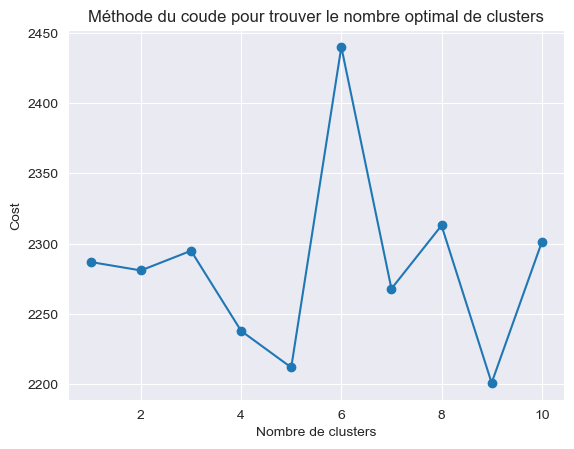

In [62]:
# Méthode du coude pour trouver le nombre optimal de clusters
costs = []
K_range = range(1, 11)

for k in K_range:
    km_huang = KModes(n_clusters=K, init='Huang', n_init=1, verbose=1)
    km_huang.fit(Y_91dx100a)
    costs.append(km_huang.cost_)

# Visualisation
plt.plot(K_range, costs, marker='o')
plt.title('Méthode du coude pour trouver le nombre optimal de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Cost')
plt.show()

        6  7  13  14  20  21  27  28  34  35  ...  72  73  74  75  78  79  80  \
APPART                                        ...                               
1       2  2   2   2   0   0   0   0   0   0  ...   0   0   0   1   0   1   1   
2       1  2   2   2   2   2   2   2   2   2  ...   1   1   0   0   1   1   0   
3       2  0   1   2   2   1   1   2   1   2  ...   1   0   0   1   1   1   0   
4       2  2   2   2   2   2   1   2   2   2  ...   1   1   0   1   1   1   1   
5       2  2   2   2   2   2   2   2   2   2  ...   1   0   0   1   1   1   1   
...    .. ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
96      2  2   2   2   2   2   2   1   2   1  ...   1   1   1   1   0   0   0   
97      2  1   2   2   2   2   1   2   2   2  ...   2   1   1   1   1   1   1   
98      2  2   2   2   1   1   2   2   2   1  ...   1   1   1   1   1   1   1   
99      2  2   2   2   2   2   0   0   2   2  ...   1   1   1   1   0   1   1   
100     1  0   2   1   2   2

<Axes: ylabel='APPART'>

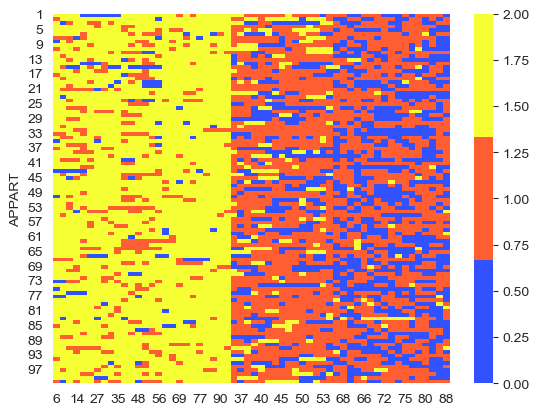

In [63]:
# Réorganisation des colonnes selon les classes attribuées par K-means
cluster_indices = [i for i in range(K_days)]

# list d'index en fonction de la classe
cluster_columns = [Y.columns[labels_huang == i] for i in cluster_indices] 
sorted_columns = []
for col_list in cluster_columns:
    sorted_columns.extend(col_list)

Y_sorted = Y[sorted_columns]
print(Y_sorted)

sns.heatmap(Y_sorted.astype(int), cmap=cmap)

In [64]:
# Silhouette Score pour évaluer la qualité de la classification
silhouette_avg = silhouette_score(Y_91dx100a, labels_huang)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.22778089171882274


In [65]:
Y.describe()

,1,2,3,4,5,6,7,8,9,10,...,82,83,84,85,86,87,88,89,90,91
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.130000,0.220000,0.150000,0.100000,0.210000,1.760000,1.72000,0.160000,0.150000,0.180000,...,0.510000,1.950000,1.870000,0.530000,0.540000,0.540000,0.560000,0.600000,1.960000,1.940000
std,0.337998,0.462317,0.411329,0.333333,0.477684,0.570663,0.58741,0.394917,0.411329,0.386123,...,0.541136,0.261116,0.418149,0.576562,0.558135,0.539734,0.574192,0.550482,0.196946,0.238683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.00000,0.000000,0.000000,0.000000,...,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.00000,0.000000,0.000000,0.000000,...,0.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.00000,0.000000,0.000000,0.000000,...,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000
max,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


## Méthode indirect ( extraction de caracteristique PCA + Kmeans )

C:\Users\eloss\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


        6  7  13  14  20  21  27  28  34  35  ...  22  23  24  25  26  29  30  \
APPART                                        ...                               
1       2  2   2   2   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2       1  2   2   2   2   2   2   2   2   2  ...   1   1   0   0   0   0   0   
3       2  0   1   2   2   1   1   2   1   2  ...   0   1   1   0   0   1   0   
4       2  2   2   2   2   2   1   2   2   2  ...   0   0   2   2   2   0   0   
5       2  2   2   2   2   2   2   2   2   2  ...   2   0   0   0   0   0   0   
...    .. ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
96      2  2   2   2   2   2   2   1   2   1  ...   0   0   0   0   0   1   0   
97      2  1   2   2   2   2   1   2   2   2  ...   0   0   0   0   0   0   0   
98      2  2   2   2   1   1   2   2   2   1  ...   0   0   0   0   0   0   0   
99      2  2   2   2   2   2   0   0   2   2  ...   0   0   0   0   0   0   0   
100     1  0   2   1   2   2

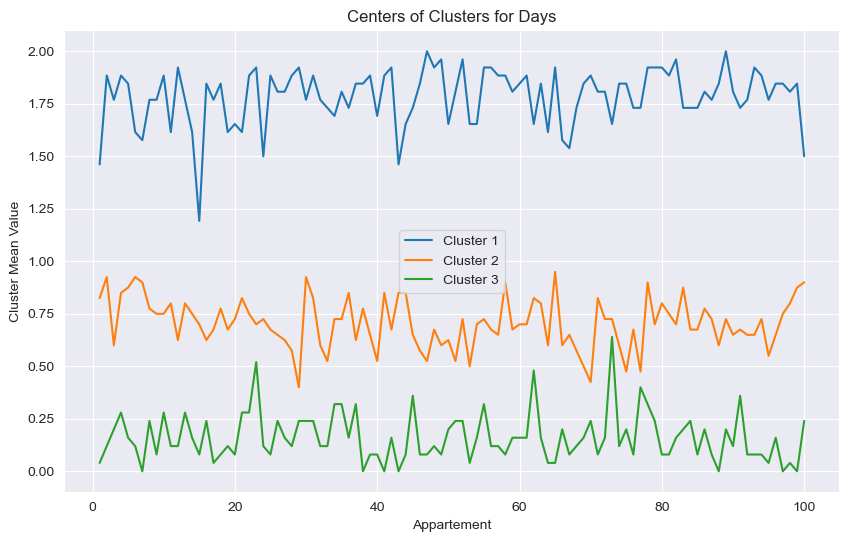

[[2 2 2 ... 1 0 0]
 [1 1 2 ... 1 0 0]
 [4 4 2 ... 1 0 0]
 ...
 [2 2 2 ... 2 0 0]
 [2 2 2 ... 2 0 0]
 [2 2 2 ... 2 0 0]]


<Axes: ylabel='APPART'>

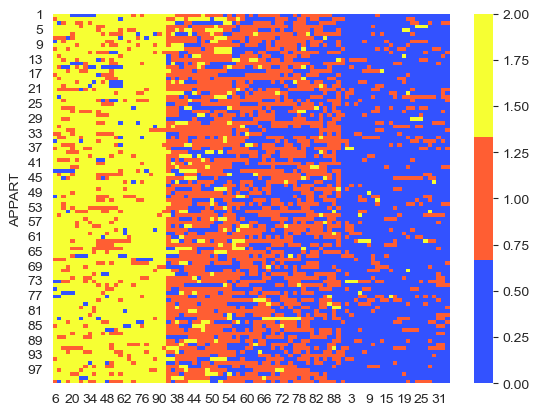

In [66]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Chargement des données
Y = pd.read_csv("tableau_Y_3.csv", index_col="APPART")

# Nombre de classes K pour la nouvelle classification
K_days = 3

# Apply PCA
p = PCA()
Y_ = p.fit_transform(X=Y.values.T)


# Appliquer K-means sur les données catégorielles des jours
kmeans_days = KMeans(n_clusters=K_days, random_state=42, n_init='auto')
labels_days = kmeans_days.fit_predict(Y_)  # Transposée car on veut clusteriser les jours, pas les appartements

# Réorganisation des colonnes selon les classes attribuées par K-means
cluster_indices = [i for i in range(K_days)]
cluster_columns = [Y.columns[labels_days == i] for i in cluster_indices]
sorted_columns = []
for col_list in cluster_columns:
    sorted_columns.extend(col_list)

Y_sorted = Y[sorted_columns]
print(Y_sorted)


# Silhouette Score pour évaluer la qualité de la classification
silhouette_avg = silhouette_score(Y.T, labels_days)
print(f"Silhouette Score: {silhouette_avg}")

# Visualisation des résultats
plt.figure(figsize=(10, 6))
for cluster in range(K_days):
    cluster_days = Y.columns[labels_days == cluster]
    plt.plot(Y[cluster_days].mean(axis=1), label=f"Cluster {cluster + 1}")

plt.title("Centers of Clusters for Days")
plt.xlabel("Appartement")
plt.ylabel("Cluster Mean Value")
plt.legend()
plt.show()

cmap_dict = {0: '#3352FF', 1: '#FF5E33', 2: '#F6FF33'}
cmap = ListedColormap([cmap_dict[i] for i in range(0, 3)])

# Afficher la matrice
print(Y_matrix)
#plt.imshow(Y_matrix.astype(dtype=int), cmap="tab10")
sns.heatmap(Y_sorted.astype(int), cmap=cmap)